In [2]:
import requests as req
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs4

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
list_continents = req.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
print(list_continents)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"82726f9c-22f2-4b76-aa1f-1f11a6dae6ec","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":8486872,"wgRevisionId":8486872,"wgArticleId":4810,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from January 2020","All article

In [4]:
continents_country = bs4(list_continents,"lxml")
continents = continents_country.find_all('h2' > 'span', {"class":"mw-headline"})
continents

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [5]:
unimportant_words = ["Antarctica","References","Other websites"];
target_continents = [continent.text for continent in continents if continent.text not in unimportant_words]
target_continents

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [6]:
ol_html = continents_country.find_all('ol')
all_countries = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]
all_countries


[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>,
  <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>,
  <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>,
  <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>,
  <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>,
  <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>,
  <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>,
  <li><a href="/wiki/Cape_Verde" title="Ca

In [7]:
countriesInContinents = []
for items in all_countries:
  countries = []
  if items:
    for country in items:
      countries = [country.find('a').text for country in items if country.find('a')]
    countriesInContinents.append(countries)
countriesInContinents

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

In [8]:
categoryContinentsCountries = pd.DataFrame(
  zip(countriesInContinents, target_continents), columns=['Country', 'Continent']
)
categoryContinentsCountries

,Country,Continent
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Canada, Mexico, United States of America, Nav...",North America
4,"[Brazil, Argentina, Bolivia, Chile, Colombia, ...",South America
5,"[Australia, Fiji, New Zealand, Federated State...",Oceania


In [9]:
categoryContinentsCountries = categoryContinentsCountries.explode('Country').reset_index(drop=True)
categoryContinentsCountries

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
199,Samoa,Oceania
200,Solomon Islands,Oceania
201,Tonga,Oceania
202,Tuvalu,Oceania


In [10]:
reportScoreCountries = req.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2020_report")
reportScoreCountries = bs4(reportScoreCountries.content,'lxml')
scoreCountriesTables = reportScoreCountries.find('table', {'class': 'wikitable'})
scoreCountriesTables

<table class="wikitable sortable">
<tbody><tr valign="top">
<th style="width: 10px;">Overall rank
</th>
<th style="width: 250px;">Country or region
</th>
<th><abbr title="Happiness score">Score</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: GDP">GDP per capita</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Social support">Social support</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Healthy life expectancy">Healthy life expectancy</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Freedom to make life choices">Freedom to make life choices</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Generosity">Generosity</abbr>
</th>
<th style="width: 10px;"><abbr title="Explained by: Perceptions of corruption">Perceptions of corruption</abbr>
</th></tr>
<tr>
<td>1</td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="1100" data-file-width="1800" decoding="async" height="14" src="//uploa

In [11]:
countriesScore = pd.read_html(str(scoreCountriesTables))
countriesScore = countriesScore[0]
countriesScore = countriesScore.rename(columns={"Country or region":"Country"})
countriesScore

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


In [12]:
merged = pd.merge(countriesScore, categoryContinentsCountries,
                  how='inner', on='Country')
merged.to_csv('final_result.csv')
merged

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
141,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
142,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
143,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa
144,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111,Africa


Text(0, 0.5, 'Happiness Score')

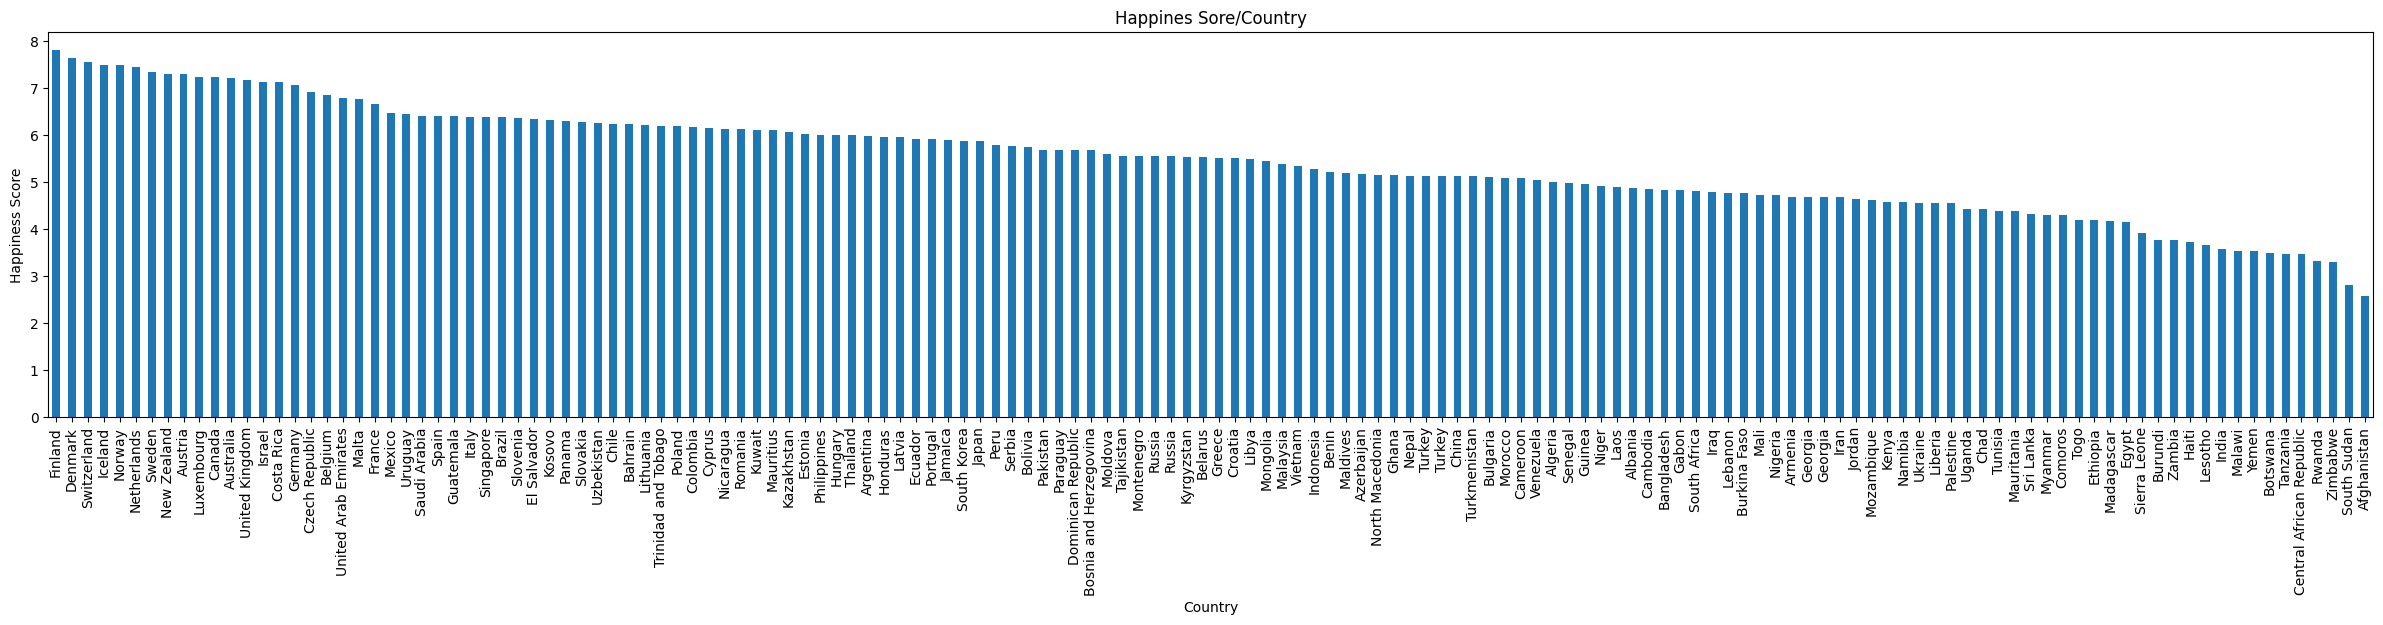

In [13]:
finalResultScore = pd.read_csv('final_result.csv', index_col=2)
ax = finalResultScore['Score'].plot(kind='bar', figsize=(30,5), title="Happines Sore/Country")
ax.set_ylabel("Happiness Score")

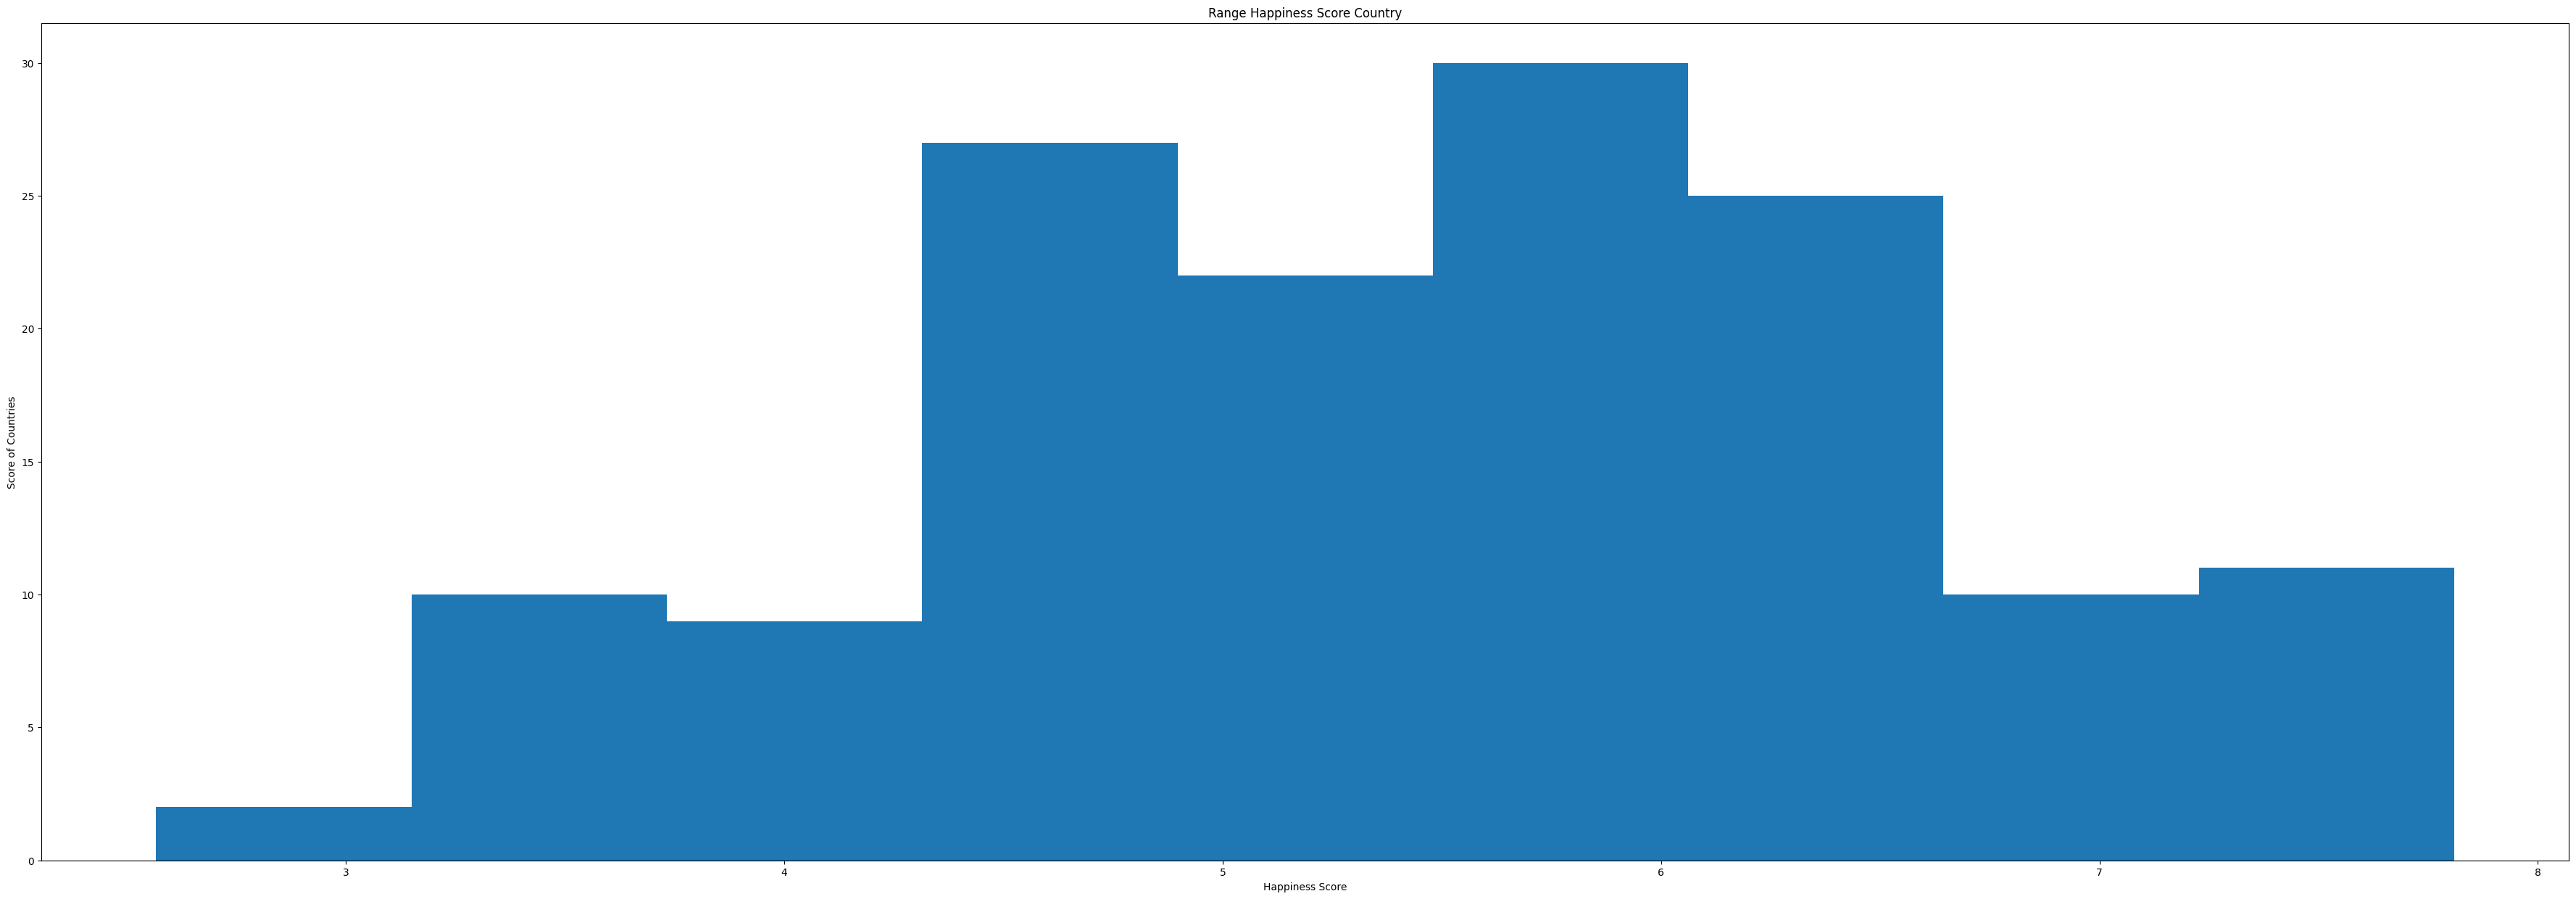

In [14]:
plt.figure(figsize=(45,15))
plt.title("Range Happiness Score Country")
plt.xlabel("Happiness Score")
plt.ylabel("Score of Countries")
plt.hist(finalResultScore['Score'], bins=9)
plt.show()

In [15]:
medianHappinessScore = merged['Score'].median()
above_average = merged.loc[merged['Score'] > medianHappinessScore]
print(above_average['Country'].to_list())

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway', 'Netherlands', 'Sweden', 'New Zealand', 'Austria', 'Luxembourg', 'Canada', 'Australia', 'United Kingdom', 'Israel', 'Costa Rica', 'Germany', 'Czech Republic', 'Belgium', 'United Arab Emirates', 'Malta', 'France', 'Mexico', 'Uruguay', 'Saudi Arabia', 'Spain', 'Guatemala', 'Italy', 'Singapore', 'Brazil', 'Slovenia', 'El Salvador', 'Kosovo', 'Panama', 'Slovakia', 'Uzbekistan', 'Chile', 'Bahrain', 'Lithuania', 'Trinidad and Tobago', 'Poland', 'Colombia', 'Cyprus', 'Nicaragua', 'Romania', 'Kuwait', 'Mauritius', 'Kazakhstan', 'Estonia', 'Philippines', 'Hungary', 'Thailand', 'Argentina', 'Honduras', 'Latvia', 'Ecuador', 'Portugal', 'Jamaica', 'South Korea', 'Japan', 'Peru', 'Serbia', 'Bolivia', 'Pakistan', 'Paraguay', 'Dominican Republic', 'Bosnia and Herzegovina', 'Moldova', 'Tajikistan', 'Montenegro', 'Russia', 'Russia', 'Kyrgyzstan', 'Belarus']


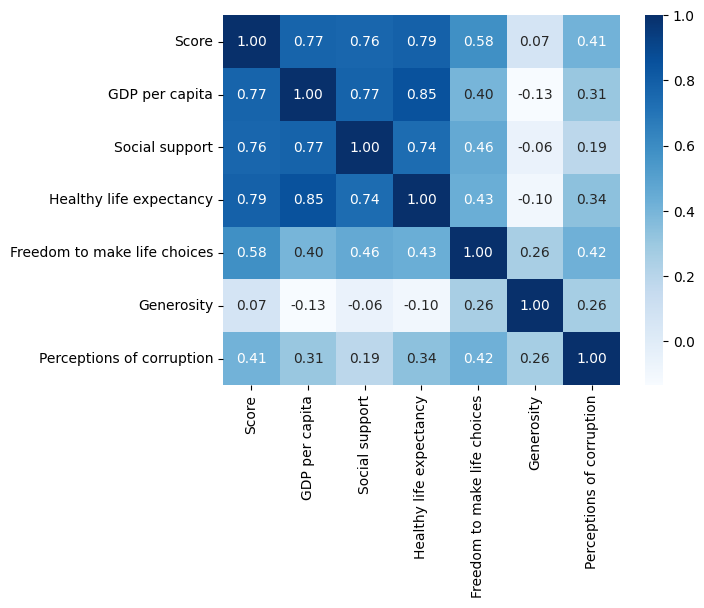

In [18]:
heatmap = merged.drop(['Overall rank','Country','Continent'], axis=1)
ax = sb.heatmap(heatmap.corr(),annot=True, fmt='.2f', cmap='Blues')

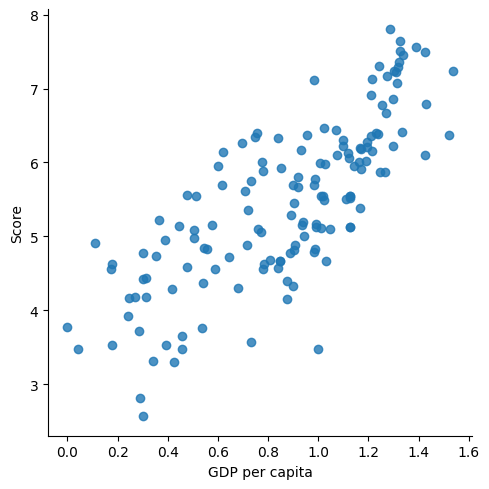

In [20]:
sb.lmplot(x='GDP per capita', y='Score', data=merged, fit_reg=False)

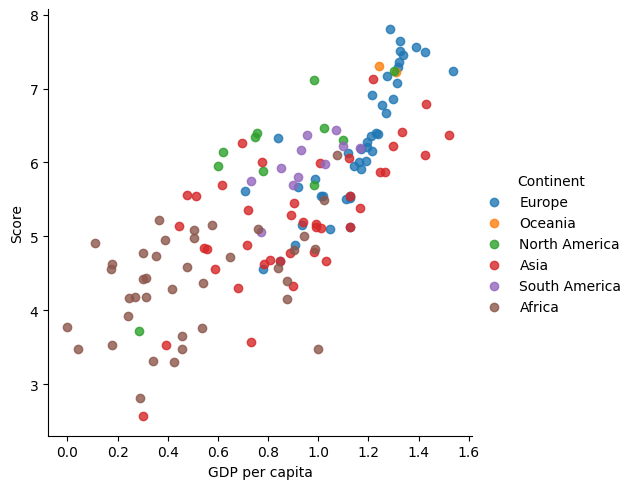

In [23]:
sb.lmplot(x='GDP per capita', y='Score', data=merged, fit_reg=False, hue='Continent')

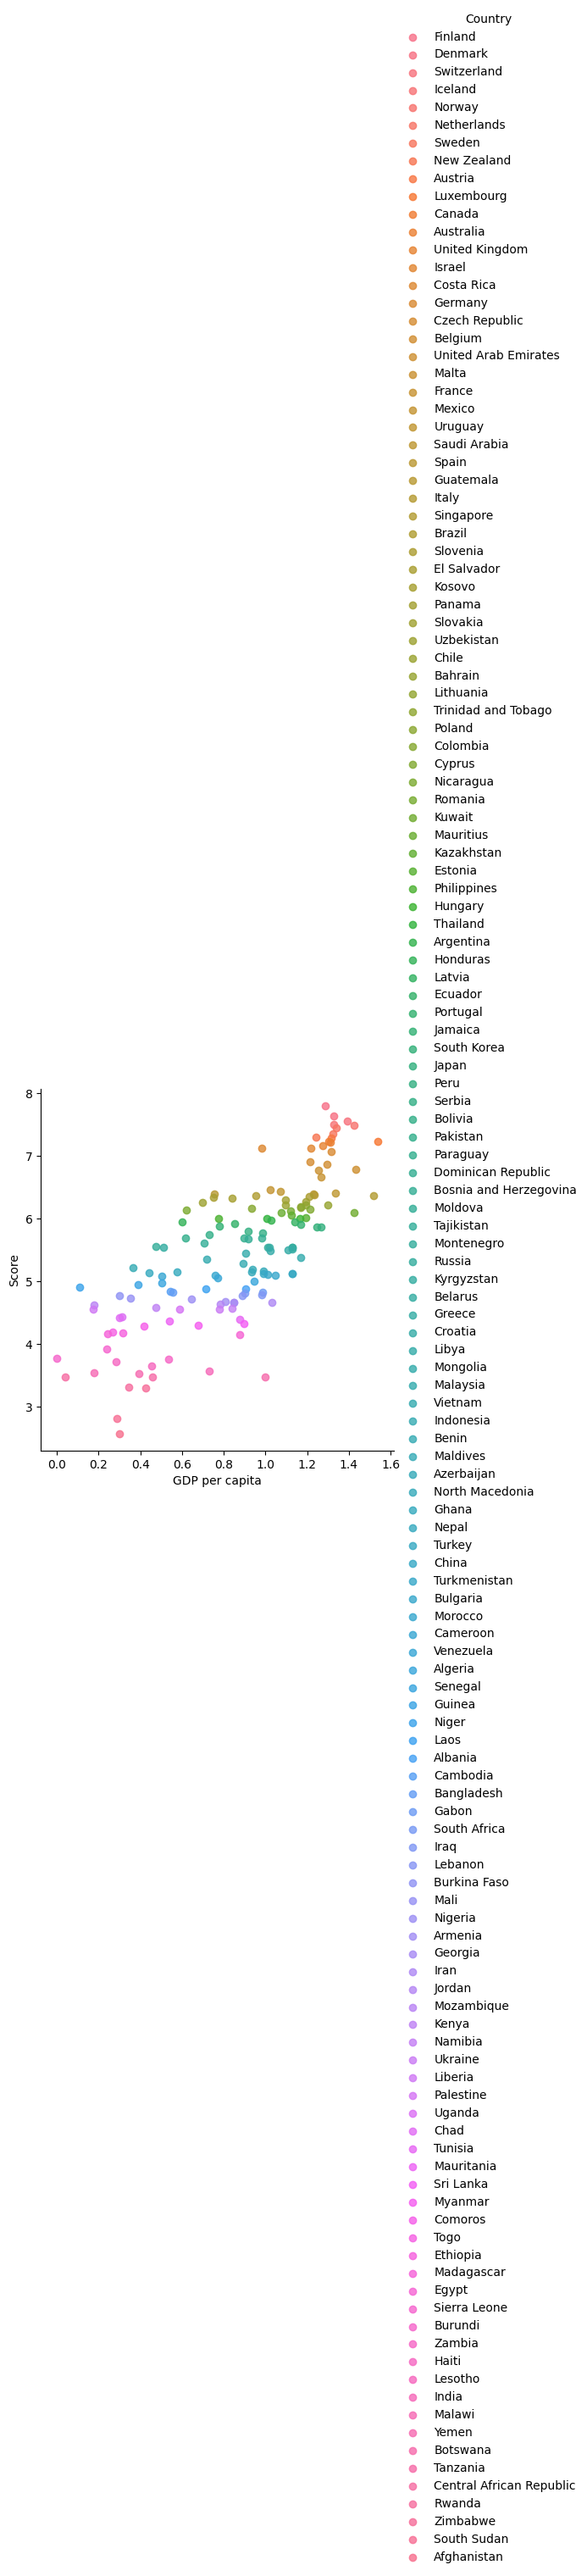

In [24]:
sb.lmplot(x='GDP per capita', y='Score', data=merged, fit_reg=True, hue='Country')